In [2]:
import pandas as pd
import numpy as np
high_data = pd.read_csv('/content/drive/MyDrive/high_data.csv')

med_data = pd.read_csv('/content/drive/MyDrive/middle_data.csv')

low_data = pd.read_csv('/content/drive/MyDrive/low_data.csv')

print(high_data.head())

       机型                              IMEI          日期           类别  \
0  X Flip  f4d3c8815c34764f6a39ddf816106424  2023-04-28  续航赛道_x0000_   
1  X Flip  6ef41eaacea279abdb33606f13ef5d3f  2023-04-28  内置程序_x0000_   
2  X Flip  23d3f4919208d9414173c58c0869f47b  2023-04-28  内置程序_x0000_   
3  X Flip  839735255dfbf22029d39a83712e5623  2023-04-28  内置程序_x0000_   
4  X Flip  dd6330b527a900c07a3186214c6c4478  2023-04-28  性能赛道_x0000_   

                                                  描述  
0  需要我过去做什么么？或者我转账给你你闪送来;卡针有没有;带个卡针;尾款多少;中国联通大厦北门...  
1  左边这个吧;现在都可;711便利店门口等哈;好;在哪？;发照片给我看看;这里只有左拐;这里只...  
2                                        主题不错_x0000_  
3  imei码：*** 1、问题现象及复现步骤：X Flip外屏上面没有小红书，很多软件都没有，...  
4  这样么;哈哈哈还有一个视频没过去呢;咱俩还视频嘛;网卡;好;然后嘞;这样么;这样;么;需要插...  


## 数据分析

In [16]:
def len_anay(text):
    len_type = int(len(text)/100)
    if len_type < 10:
      return len_type
    else:
      return 10




In [19]:
import matplotlib.pyplot as plt

phone_type = {}
desc_len = dict({i: 0 for i in range(10)})

for index, row in high_data.iterrows():
    leng = len_anay((str(row["描述"])))
    if(leng not in desc_len):
      desc_len[leng] = 1
    else:
      desc_len[leng] += 1

    if(row["机型"] not in phone_type):
      phone_type[row["机型"]] = 1
    else:
      phone_type[row["机型"]] += 1

for index, row in med_data.iterrows():
    leng = len_anay((str(row["描述"])))
    if(leng not in desc_len):
      desc_len[leng] = 1
    else:
      desc_len[leng] += 1

    if(row["机型"] not in phone_type):
      phone_type[row["机型"]] = 1
    else:
      phone_type[row["机型"]] += 1

for index, row in low_data.iterrows():
    leng = len_anay((str(row["描述"])))
    if(leng not in desc_len):
      desc_len[leng] = 1
    else:
      desc_len[leng] += 1

    if(row["机型"] not in phone_type):
      phone_type[row["机型"]] = 1
    else:
      phone_type[row["机型"]] += 1


In [7]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-01-14 09:22:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.162.138, 142.251.162.113, 142.251.162.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-01-14 09:22:23--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-01-14 

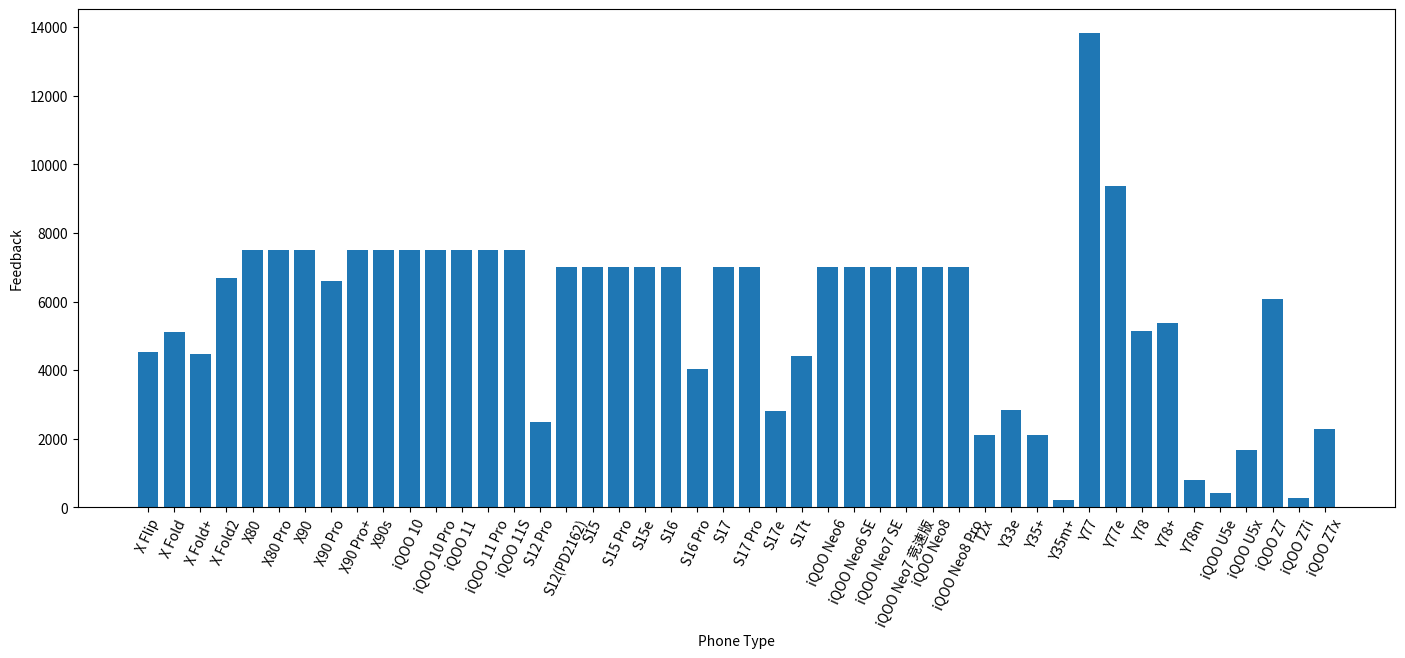

In [8]:
keys = list(phone_type.keys())
values = list(phone_type.values())

plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Phone Type')
plt.ylabel('Feedback')

plt.xticks(keys, rotation=65)
plt.subplots_adjust(bottom=0.05)

plt.show()

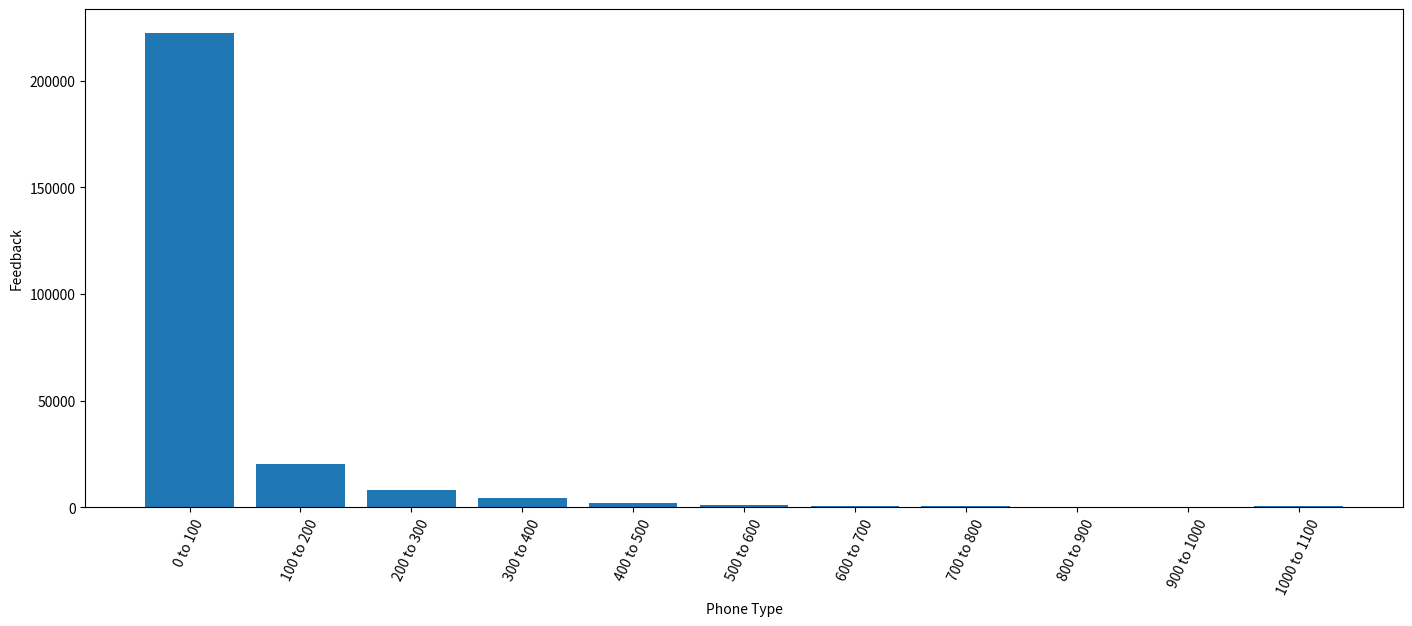

In [21]:
keys = list(desc_len.keys())
values = list(desc_len.values())

keys = ["{} to {}".format(len_type*100,len_type*100+100) for len_type in keys]

plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Phone Type')
plt.ylabel('Feedback')

plt.xticks(keys, rotation=65)
plt.subplots_adjust(bottom=0.05)

plt.show()

## 模型构建

In [ ]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch

tokenizer=BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')
model=BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [ ]:
def sentiment_class(text):
    # print(type(text["描述"]))
    output=model(torch.tensor([tokenizer.encode(str(text["描述"])[0:500])]))
    output_list = torch.nn.functional.softmax(output.logits,dim=-1).tolist()

    return output_list[0]

In [23]:
sample_high = high_data.sample(n=8000)
sample_med  =  med_data.sample(n=8000)
sample_low  =  low_data.sample(n=8000)

In [ ]:
sample_high['score']=sample_high.apply(sentiment_class,axis=1)

In [ ]:
sample_high.to_csv("high_sentiment.csv")

In [24]:
sample_high = pd.read_csv('/content/drive/MyDrive/high_sentiment.csv')

In [25]:
sample_high.head()

,Unnamed: 0,机型,IMEI,日期,类别,描述,score
0,90713,iQOO 11 Pro,48232b806b27ca743cb7ee37d423e93f,2023-04-20,性能赛道,键盘会突然卡住用不了,"[0.9976322650909424, 0.002367763314396143]"
1,52173,X90 Pro+,e069b6dd246f6e03c3d4da085ce88f4e,2022-12-31,内置程序,清晰的图片,"[0.11142174154520035, 0.8885782361030579]"
2,11512,X Fold+,0c5694634a7caa90080e1f19f29b2163,2023-01-17,内置程序,微信设置多窗应用后；进入朋友圈；里面的信息就会显示不全,"[0.957099199295044, 0.04290079325437546]"
3,91323,iQOO 11 Pro,f735bf4a1c179edf1a740ee7c385484e,2023-05-11,性能赛道,建议你们修复系统问题，新机升完系统出现亮屏延迟，都已经延迟3秒了才亮,"[0.9962589740753174, 0.0037410228978842497]"
4,39712,X90,f724be7b5b2c922ed9cc5b2affd19e5a,2023-01-07,性能赛道,同一个路由器，同样距离，1500元的荣耀play4t可以稳定连接使用，这台手机频繁掉线。而且...,"[0.9993318915367126, 0.0006681134109385312]"


In [ ]:
sample_med['score']=sample_med.apply(sentiment_class,axis=1)

In [ ]:
sample_med.to_csv("med_sentiment.csv")

In [ ]:
sample_low['score']=sample_low.apply(sentiment_class,axis=1)

In [26]:
sample_low.to_csv("low_sentiment.csv")

In [27]:
sample_med = pd.read_csv('/content/drive/MyDrive/med_sentiment.csv')
sample_low = pd.read_csv('/content/drive/MyDrive/low_sentiment.csv')

In [29]:
import jieba
from jieba import analyse

In [72]:
stop_words_file_path = '/content/drive/MyDrive/baidu_stopwords.txt'

with open(stop_words_file_path, 'r', encoding='utf-8') as file:
    stop_words = [line.strip() for line in file]

stop_words.append('手机')
stop_words.append('不了')

In [73]:
def keyword_extract(text):

    describe = str(text["描述"])
    seg_list = jieba.cut(describe, cut_all=False)
    filtered_seg_list = [word for word in seg_list if word not in stop_words]

    seg_str = " ".join(filtered_seg_list)
    keywords = []
    if len(describe)<=50 :
        keywords = analyse.extract_tags(seg_str, topK=5, withWeight=False)
    else:
        keywords = analyse.textrank(seg_str, topK=5, withWeight=False)
    return keywords

In [74]:
sample_high['key_word']=sample_high.apply(keyword_extract,axis=1)

In [75]:
sample_med['key_word']=sample_med.apply(keyword_extract,axis=1)

In [76]:
sample_low['key_word']=sample_low.apply(keyword_extract,axis=1)

In [101]:
sample_low

,Unnamed: 0,机型,IMEI,日期,类别,描述,score,key_word
0,4321,Y33e,4d312c63da054f5b65de0ff6b8ba4974,2023-08-12,音频,你好;群主;咨询一下;我一台平板学习机不能充电了可以修吗,"[0.1568613499403, 0.8431386351585388]","[群主, 学习机, 充电, 平板, 你好]"
1,28683,Y77e,f4eb35ecf65065a2af0d865896f8d37c,2023-08-25,第三方程序,打不开我的世界和蛋仔派对,"[0.9912390112876892, 0.008760927245020866]","[派对, 打不开, 世界]"
2,41709,Y78m,c5818a06dc5c6104109c4b4c70cde7f2,2023-10-24,内置程序,卡一收不到验证码，信息。但卡2可以发消息，也收不到验证码,"[0.9967813491821289, 0.0032185900490731]","[收不到, 验证码, 发消息, 卡一, 但卡]"
3,48767,iQOO Z7,2f37e6c795d088e85b265c86ea6711c9,2023-09-15,外观设计,十分漂亮！,"[0.428758442401886, 0.571241557598114]",[漂亮]
4,36374,Y78+,b7bd7665f93b526faf17b868808262cc,2023-06-05,续航赛道,这个手机充满一次电。待机一天都用不了。也忒耗电了吧;反正耗电特别快。;好的。,"[0.01831560581922531, 0.9816843867301941]","[耗电, 待机, 反正, 充满, 特别]"
...,...,...,...,...,...,...,...,...
7995,35225,Y78,7196adfe79908a155091296e17812e69,2023-10-22,内置程序,草你亲妈的,"[0.9882605075836182, 0.011739549227058887]",[亲妈]
7996,46923,iQOO Z7,6fbd7af0a8ce30282e0677ed5e7a003e,2023-08-01,通话,您好，姐;我想问一下打电话的时候流量用不了怎么调,"[0.18898282945156097, 0.8110170960426331]","[您好, 流量, 打电话]"
7997,13043,Y77,24de9b871656a31d8cf2fe9d360f5e33,2023-04-12,内置程序,熄屏状态为什么不能唤醒,"[0.9588342905044556, 0.04116572439670563]","[熄屏, 唤醒, 状态]"
7998,35818,Y78+,dfd3b2eaddd583d92159f001e8ec41ca,2023-05-08,性能赛道,🎨vivo Y78+ 高颜值配色，予你心动🏞️「天青色」碧水天高，烟波浩渺🌻「暖阳金」春日熙...,"[0.0003195430908817798, 0.9996805191040039]","[电信, 全国, 辉映, 月影, 颜值]"


## 结果分析

In [77]:
from wordcloud import WordCloud

In [78]:
def all_key_word(sample):
    all_word = []
    for index, row in sample.iterrows():
        all_word.extend(row['key_word'])
    return all_word

def dispaly_cloud(all_word):
    seg_str = " ".join(all_word)
    wordcloud = WordCloud(font_path="TaipeiSansTCBeta-Regular.ttf", width=800, height=400, background_color="white").generate(seg_str)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # 不显示坐标轴
    plt.show()

In [79]:
high_all_word = all_key_word(sample_high)
med_all_word = all_key_word(sample_med)
low_all_word = all_key_word(sample_low)

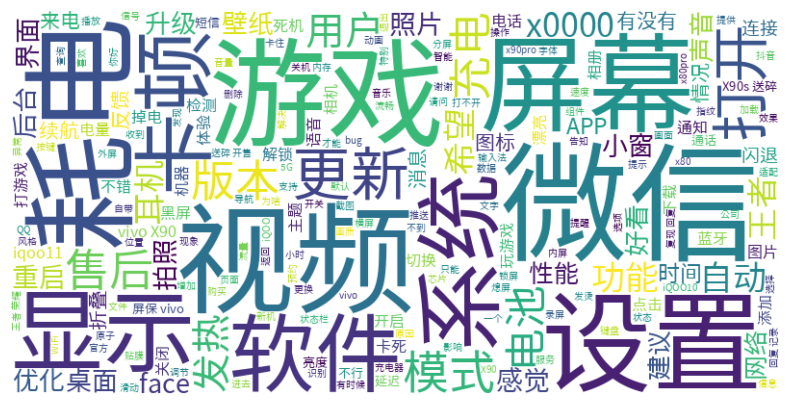

In [80]:
dispaly_cloud(high_all_word)

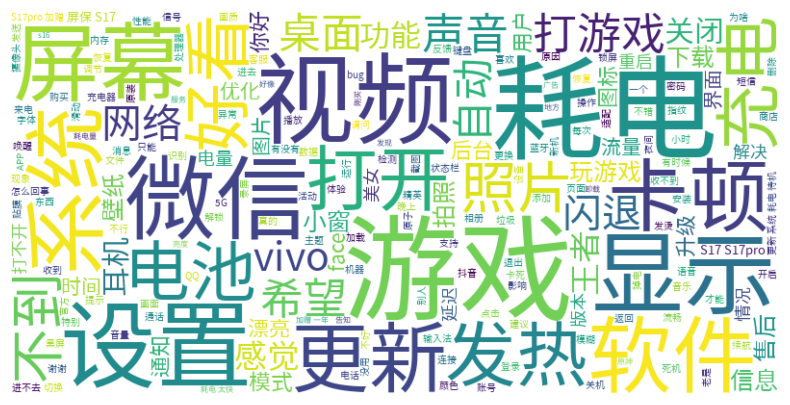

In [81]:
dispaly_cloud(med_all_word)

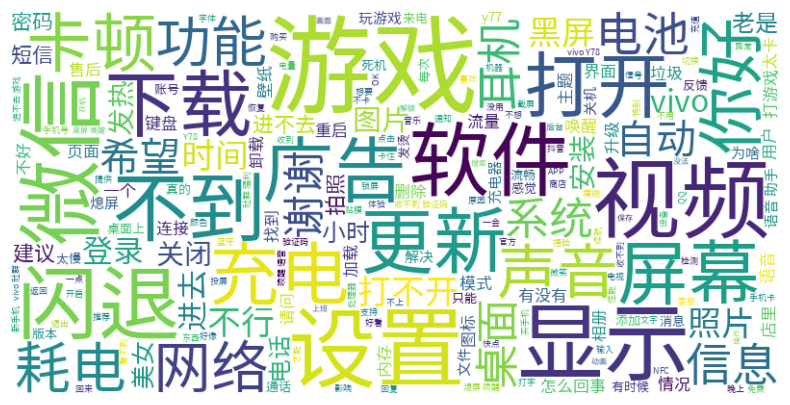

In [82]:
dispaly_cloud(low_all_word)

In [135]:
all_word = []

all_word.extend(low_all_word)
all_word.extend(high_all_word)
all_word.extend(med_all_word)


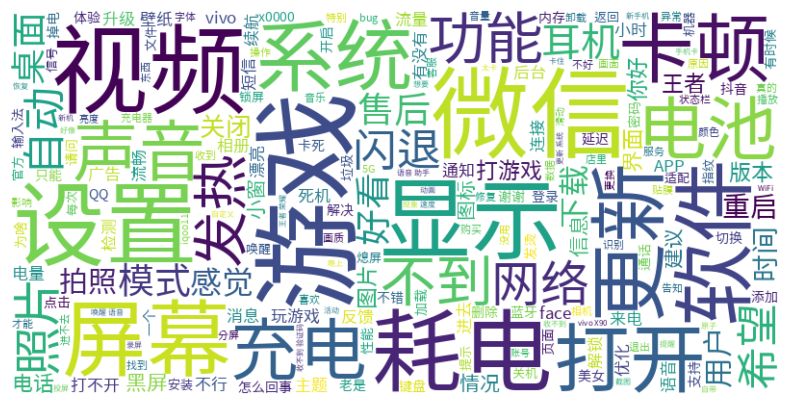

In [136]:
dispaly_cloud(all_word)

In [90]:
raw_phone_type_review = {}

In [91]:
def review_comp(sample):
    for index, row in sample.iterrows():
        if row['机型'] not in raw_phone_type_review:
          raw_phone_type_review[row['机型']] = []
          raw_phone_type_review[row['机型']].extend(row['key_word'])
        else:
          raw_phone_type_review[row['机型']].extend(row['key_word'])

In [94]:
review_comp(sample_high)
review_comp(sample_med)
review_comp(sample_low)

In [95]:
from collections import Counter
def most_common_elements(list, n):
    counter = Counter(list)
    most_common_elements = counter.most_common(n)
    return [element for element, count in most_common_elements]


In [96]:
phone_type_review = {}

In [147]:
for key,val in raw_phone_type_review.items():
    phone_type_review[key] = most_common_elements(val,10)

In [148]:
phone_type_review

{'iQOO 11 Pro': ['游戏', '耗电', '屏幕', '微信', '显示', '更新', '视频', '设置', '充电', '系统'],
 'X90 Pro+': ['视频', '设置', '微信', '耗电', '版本', '照片', '图片', '显示', '系统', '模式'],
 'X Fold+': ['设置', '微信', '耗电', '折叠', '提供', '软件', '回复', '显示', '用户', '售后'],
 'X90': ['微信', '视频', 'x90', '卡顿', '游戏', '耗电', '回复', '屏幕', '系统', '显示'],
 'iQOO 10 Pro': ['耗电', '视频', '游戏', '微信', '显示', '系统', '更新', '软件', '打开', '后台'],
 'iQOO 11': ['游戏', '卡顿', '耗电', '王者', '微信', '视频', '设置', 'iqoo11', '性能', '软件'],
 'X80': ['视频', '耗电', '更新', '屏幕', '设置', '打开', '微信', '系统', 'x80', '希望'],
 'X Fold2': ['折叠', '漂亮', '显示', '售后', '好看', 'vivo', '系统', '屏幕', '视频', '微信'],
 'X90 Pro': ['设置', '打开', '微信', '优化', '游戏', '拍照', '耳机', '视频', '系统', 'x90pro'],
 'X90s': ['vivo', 'X90s', '屏保', '送碎', '开售', 'x90s', '好看', '耳机', '漂亮', '充电'],
 'iQOO 11S': ['游戏',
  '系统',
  '更新',
  '耗电',
  '好看',
  '耳机',
  '不错',
  'iQOO11s',
  '性能',
  'iqoo11s'],
 'X Fold': ['售后', '微信', '用户', '回复', '屏幕', '提供', '折叠', '系统', '内屏', '建议'],
 'X80 Pro': ['更新', '耗电', '微信', '视频', '软件', '卡顿', '游戏', '显示', 'x80pro

In [180]:
import ast

In [184]:

phone_type_att={}

phone_att_review_pos={}

phone_att_review_neg={}

def review_att(sample):
    for index, row in sample.iterrows():
        list_att = eval(row['score'])
        if row['机型'] not in phone_type_att:
          phone_type_att[row['机型']] = {0:0 , 1:0, 2:0}
          phone_att_review_pos[row['机型']] = []
          phone_att_review_neg[row['机型']] = []

          if list_att[0]>list_att[1]+0.3:
              phone_type_att[row['机型']][0] += 1
              phone_att_review_neg[row['机型']].extend(row["key_word"])

          elif list_att[0]+0.3<list_att[1]:
              phone_type_att[row['机型']][1] += 1
              phone_att_review_pos[row['机型']].extend(row["key_word"])
          else :
              phone_type_att[row['机型']][2] += 1

        else:
          if list_att[0]>list_att[1]+0.3:
              phone_type_att[row['机型']][0] += 1
              phone_att_review_neg[row['机型']].extend(row["key_word"])
          elif list_att[0]+0.3<list_att[1]:
              phone_type_att[row['机型']][1] += 1
              phone_att_review_pos[row['机型']].extend(row["key_word"])
          else :
              phone_type_att[row['机型']][2] += 1

In [185]:
review_att(sample_high)
review_att(sample_med)
review_att(sample_low)

In [186]:
phone_type_att

{'iQOO 11 Pro': {0: 393, 1: 139, 2: 36},
 'X90 Pro+': {0: 390, 1: 151, 2: 44},
 'X Fold+': {0: 246, 1: 103, 2: 29},
 'X90': {0: 407, 1: 138, 2: 30},
 'iQOO 10 Pro': {0: 418, 1: 126, 2: 39},
 'iQOO 11': {0: 399, 1: 111, 2: 37},
 'X80': {0: 447, 1: 100, 2: 38},
 'X Fold2': {0: 251, 1: 200, 2: 46},
 'X90 Pro': {0: 367, 1: 138, 2: 49},
 'X90s': {0: 269, 1: 234, 2: 112},
 'iQOO 11S': {0: 307, 1: 198, 2: 64},
 'X Fold': {0: 299, 1: 81, 2: 28},
 'X80 Pro': {0: 392, 1: 157, 2: 47},
 'iQOO 10': {0: 467, 1: 93, 2: 38},
 'X Flip': {0: 183, 1: 119, 2: 40},
 'iQOO Neo6': {0: 443, 1: 60, 2: 39},
 'S17': {0: 145, 1: 321, 2: 57},
 'S12(PD2162)': {0: 443, 1: 88, 2: 32},
 'S12 Pro': {0: 126, 1: 33, 2: 14},
 'iQOO Neo7 竞速版': {0: 388, 1: 100, 2: 29},
 'S15e': {0: 401, 1: 117, 2: 45},
 'iQOO Neo7 SE': {0: 390, 1: 107, 2: 28},
 'S15': {0: 421, 1: 103, 2: 49},
 'iQOO Neo8 Pro': {0: 361, 1: 121, 2: 39},
 'S15 Pro': {0: 347, 1: 120, 2: 41},
 'S16': {0: 353, 1: 135, 2: 40},
 'S16 Pro': {0: 196, 1: 87, 2: 19},
 

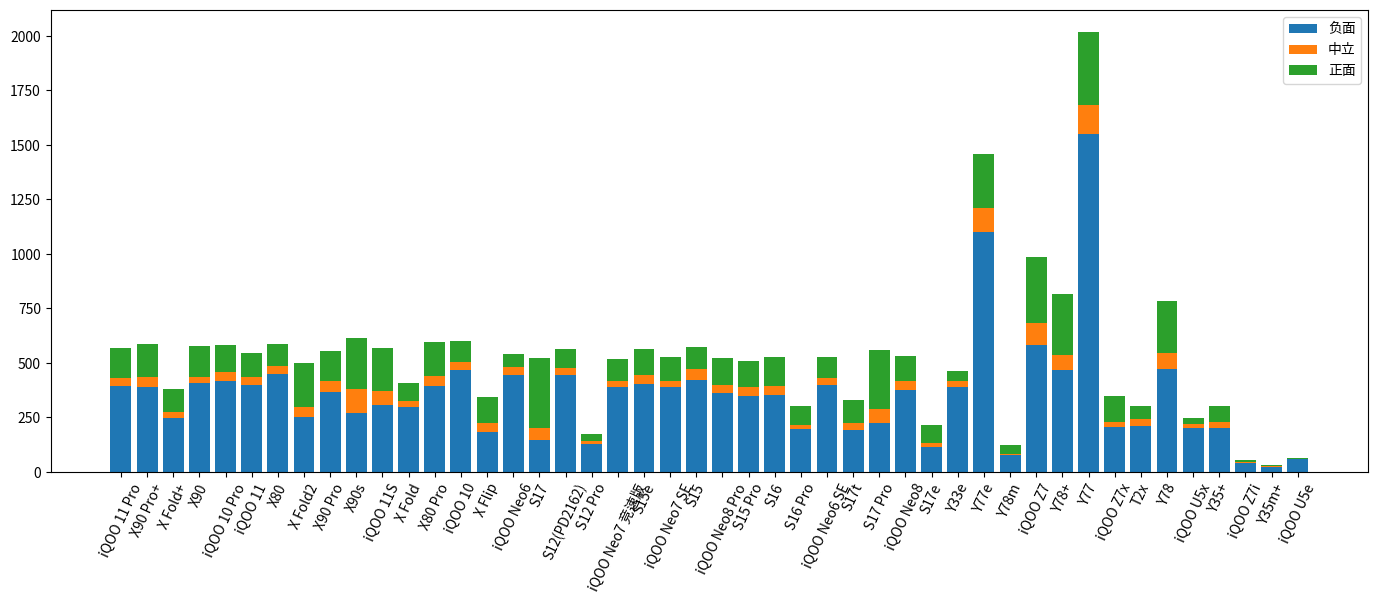

In [191]:

plt.figure(figsize=(17, 6))

# Create a stacked bar chart
plt.bar(list(phone_type_att.keys()), [d[0] for d in list(phone_type_att.values())], label='负面')
plt.bar(list(phone_type_att.keys()), [d[2] for d in list(phone_type_att.values())], bottom=[d[0] for d in list(phone_type_att.values())], label='中立')
plt.bar(list(phone_type_att.keys()), [d[1] for d in list(phone_type_att.values())], bottom=[d[0]+d[2] for d in list(phone_type_att.values())], label='正面')


plt.xticks(list(phone_type_att.keys()), rotation=65)
plt.legend()
plt.show()

In [198]:

for key,val in phone_att_review_pos.items():
    phone_att_review_pos[key] = most_common_elements(val,5)

for key,val in phone_att_review_neg.items():
    phone_att_review_neg[key] = most_common_elements(val,5)

In [209]:
df1 = pd.DataFrame({k: v for k, v in list(phone_att_review_pos.items())[:20]})
df2 = pd.DataFrame({k: v for k, v in list(phone_att_review_pos.items())[20:]})

In [210]:
df1

,iQOO 11 Pro,X90 Pro+,X Fold+,X90,iQOO 10 Pro,iQOO 11,X80,X Fold2,X90 Pro,X90s,iQOO 11S,X Fold,X80 Pro,iQOO 10,X Flip,iQOO Neo6,S17,S12(PD2162),S12 Pro,iQOO Neo7 竞速版
0,性能,图片,折叠,游戏,视频,性能,更新,漂亮,好看,漂亮,不错,折叠,照片,游戏,x0000,游戏,S17,壁纸,游戏,竞速
1,更新,设置,性能,耗电,摄像头,续航,系统,好看,壁纸,好看,好看,耳机,性能,耗电,折叠,希望,好看,游戏,vivo,电池
2,游戏,高清,vivo,性能,采用,游戏,希望,不错,游戏,x90s,性能,壁纸,技巧,感觉,壁纸,下载,vivo,显示,好看,壁纸
3,功能,续航,微信,x90,玻璃,不错,模式,vivo,vivo,不错,漂亮,主题,签到,face,外屏,性能,漂亮,电量,社群,续航
4,速度,模式,耗电,希望,软件,iQOO11,耗电,折叠,社群,vivo,11s,性能,不错,打开,签到,设置,柔光,字体,福利,neo7


In [211]:
df2

,S15e,iQOO Neo7 SE,S15,iQOO Neo8 Pro,S15 Pro,S16,S16 Pro,iQOO Neo6 SE,S17t,S17 Pro,...,Y78+,Y77,iQOO Z7x,T2x,Y78,iQOO U5x,Y35+,iQOO Z7i,Y35m+,iQOO U5e
0,游戏,壁纸,系统,游戏,游戏,壁纸,照片,设置,你好,好看,...,vivo,唤醒,续航,模式,vivo,好玩,你好,语音,微笑,几秒
1,vivo,耗电,视频,更新,耗电,设置,vivo,不错,社群,漂亮,...,谢谢,游戏,电池,耗电,好屏,游戏,充电,父母,设置,延迟
2,福利,电池,壁纸,屏幕,vivo,视频,美女,游戏,游戏,不错,...,流畅,你好,vivo,电池,高颜值,不错,美女,处理器,美女,录像
3,视频,更新,耗电,系统,设置,你好,功能,电池,谢谢,美女,...,20,谢谢,超强,希望,Y78,流畅,谢谢,低功耗,想买个,选择
4,你好,vivo,s15,耗电,流畅,美女,图片,桌面,vivo,谢谢,...,福利,vivo,性能,T2X,y78,显示,请问,电池,型号,好听
